# 01 — Data Exploration & Initial Analysis

This notebook performs an exploratory analysis of the **Diabetes Hospital Stay Prediction Dataset**.  
The goal is to identify data quality issues, understand feature distributions, and detect patterns that might influence the target variable (`time_in_hospital`).

---

### 📋 Key Objectives
1. Load and inspect the dataset structure  
2. Explore missing values and unique feature counts  
3. Separate numerical and categorical columns  
4. Analyze statistical distributions of key features  
5. Examine correlations and potential outliers  
6. Perform grouped analyses to understand clinical trends  

---

> **Outcome:** A clear understanding of dataset quality and patterns that will guide the preprocessing and modeling stages.



In [ ]:
# Setup: imports and display options 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 120)
pd.set_option('display.width', 160)

print("Versions -> pandas:", pd.__version__, "| numpy:", np.__version__)


Versions -> pandas: 2.2.2 | numpy: 1.26.4


## 1️⃣ Load the Dataset

We start by importing core libraries and loading the dataset.  
This step also provides an overview of available columns and data dimensions.


In [8]:
import os
print("Current working directory:", os.getcwd())
print("Files in current dir:", os.listdir())


Current working directory: d:\Projects\Diabetes_Hospital_Stay_Prediction\notebooks
Files in current dir: ['data_exploration.ipynb']


In [9]:
# Load dataset 
CSV_PATH = "../data/raw/diabetic_data.csv"

df = pd.read_csv(CSV_PATH)
print("Loaded shape:", df.shape)
print("Columns:", list(df.columns)[:10], "...")



Loaded shape: (101766, 50)
Columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital'] ...


In [10]:
# Quick preview 

display(df.head())  
print("\nData types:")
print(df.dtypes.value_counts())  # how many numeric/object etc.

print("\nNumeric summary (describe):")
print(df.describe())  # only numeric columns by default


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO



Data types:
object    37
int64     13
Name: count, dtype: int64

Numeric summary (describe):
       encounter_id   patient_nbr  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
count  1.017660e+05  1.017660e+05      101766.000000             101766.000000        101766.000000     101766.000000       101766.000000   101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006                  3.715642             5.754437          4.395987           43.095641        1.339730   
std    1.026403e+08  3.869636e+07           1.445403                  5.280166             4.064081          2.985108           19.674362        1.705807   
min    1.252200e+04  1.350000e+02           1.000000                  1.000000             1.000000          1.000000            1.000000        0.000000   
25%    8.496119e+07  2.341322e+07           1.000000                  1.000000             1.000000          2.000000    

## 2️⃣ Missing Values & Unique Feature Counts

To assess data quality, we compute the percentage of missing values per feature  
and the count of unique entries for categorical and numeric columns.

> High missingness (e.g., `max_glu_serum`, `A1Cresult`) may require careful imputation or exclusion.



In [11]:
# Check percentage of missing values per column
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
print("Missing values (%):")
print(missing_pct[missing_pct > 0].round(2))


Missing values (%):
max_glu_serum    94.75
A1Cresult        83.28
dtype: float64


In [13]:
# Count unique values in each column
nunique = df.nunique().sort_values(ascending=False)
print("Unique values per column:")
print(nunique.head(20)) 


Unique values per column:
encounter_id                101766
patient_nbr                  71518
diag_3                         790
diag_2                         749
diag_1                         717
num_lab_procedures             118
num_medications                 75
medical_specialty               73
number_outpatient               39
number_emergency                33
discharge_disposition_id        26
number_inpatient                21
payer_code                      18
admission_source_id             17
number_diagnoses                16
time_in_hospital                14
age                             10
weight                          10
admission_type_id                8
num_procedures                   7
dtype: int64


## 3️⃣ Identify Numeric and Categorical Columns

Separating numerical and categorical variables allows different handling strategies:  
- **Numeric features:** standardization, outlier treatment, correlation analysis  
- **Categorical features:** encoding, frequency analysis



In [ ]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [col for col in df.columns if col not in numeric_cols]

print("Numeric columns:", len(numeric_cols))
print(numeric_cols[:10], "...")  
print("\nCategorical columns:", len(categorical_cols))
print(categorical_cols[:10], "...")


Numeric columns: 13
['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient'] ...

Categorical columns: 37
['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum'] ...


## 4️⃣ Descriptive Statistics for Numerical Features

Here we examine the statistical summary (mean, std, min, max, quartiles)  
for numeric features such as `time_in_hospital`, `num_medications`, and `num_lab_procedures`.

> This step helps identify skewed distributions and extreme values.


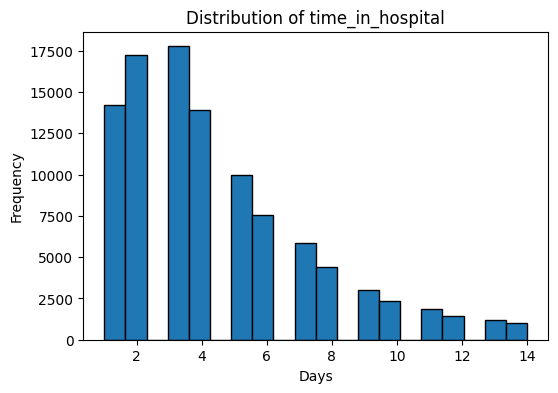

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64


In [15]:
# Plot distribution of the target variable
TARGET = "time_in_hospital"

plt.figure(figsize=(6,4))
plt.hist(df[TARGET], bins=20, edgecolor='black')
plt.title("Distribution of time_in_hospital")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

print(df[TARGET].describe())


## 5️⃣ Correlation with Target Variable (`time_in_hospital`)

We compute Pearson correlation coefficients between the target and all numeric predictors.

> Strongly correlated features such as `num_medications`, `num_lab_procedures`, and `number_diagnoses`  
> may serve as key predictors for hospital stay duration.


Top correlations with target (time_in_hospital):
num_medications             0.466135
num_lab_procedures          0.318450
number_diagnoses            0.220186
num_procedures              0.191472
discharge_disposition_id    0.162748
number_inpatient            0.073623
admission_source_id        -0.006965
number_outpatient          -0.008916
number_emergency           -0.009681
admission_type_id          -0.012500
Name: time_in_hospital, dtype: float64


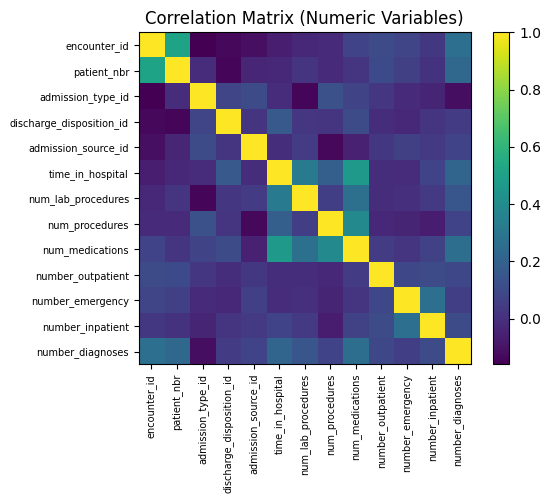

In [16]:
# Compute correlation matrix for numeric columns
corr = df[numeric_cols].corr()

# Korelasyonu hedef değişkene göre sırala
target_corr = corr[TARGET].drop(TARGET).sort_values(ascending=False)
print("Top correlations with target (time_in_hospital):")
print(target_corr.head(10))

# Korelasyon matrisi görselleştirme (matplotlib)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
cax = ax.imshow(corr, interpolation='nearest')
ax.set_title('Correlation Matrix (Numeric Variables)')
fig.colorbar(cax)
ax.set_xticks(range(len(numeric_cols)))
ax.set_yticks(range(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=90, fontsize=7)
ax.set_yticklabels(numeric_cols, fontsize=7)
plt.tight_layout()
plt.show()


## 6️⃣ Outlier Detection 

To identify potential anomalies, we apply an interquartile range (IQR)–based approach  
to estimate the percentage of outliers per numeric feature.

> Features with high outlier rates (e.g., `number_outpatient`, `number_emergency`)  
> may require Winsorization or robust scaling during preprocessing.


In [17]:
# Detect outlier ratios using IQR method
def iqr_outlier_ratio(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).mean()

ratios = {col: iqr_outlier_ratio(df[col].dropna()) for col in numeric_cols if df[col].dtype != 'O'}
ratios = pd.Series(ratios).sort_values(ascending=False)

print("Aykırı değer oranları (%):")
print((ratios * 100).round(2))


Aykırı değer oranları (%):
number_outpatient           16.45
number_emergency            11.19
discharge_disposition_id     9.65
number_inpatient             6.93
admission_source_id          6.84
num_procedures               4.87
num_medications              2.51
time_in_hospital             2.21
admission_type_id            0.34
number_diagnoses             0.28
patient_nbr                  0.24
num_lab_procedures           0.14
encounter_id                 0.00
dtype: float64


## 7️⃣ Demographic & Clinical Relationship Exploration

To examine the hypotheses (H1–H4) defined in the project plan,  
we visualize how demographic and clinical factors influence **hospital stay duration** (`time_in_hospital`).

- **H1:** Older patients tend to stay longer.  
- **H2:** Patients with more prescribed medications stay longer.  
- **H3:** Patients with more prior inpatient visits stay longer.  
- **H4:** Higher `A1Cresult` values are associated with longer hospital stays.

Scatter plots are used to explore continuous relationships,  
while group-wise averages are used for categorical variables like `A1Cresult`.


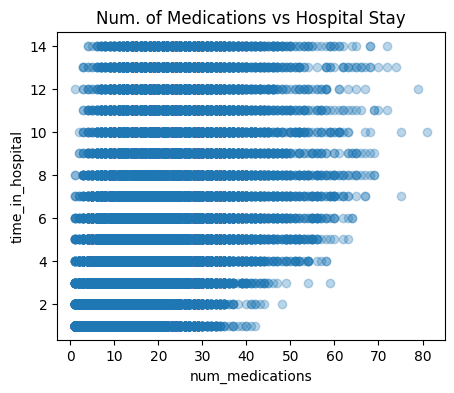

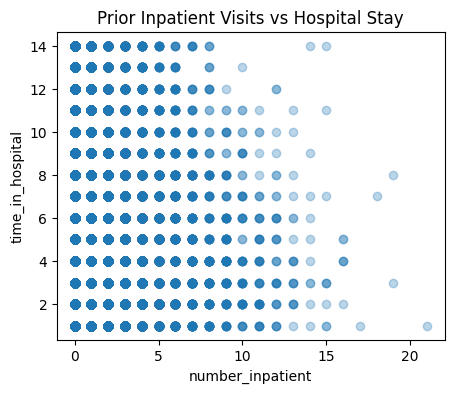

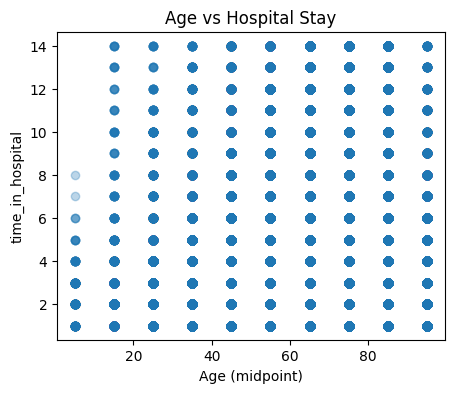

Correlation (Age vs Stay): 0.10751491534252809
Mean hospital stay by A1Cresult:
A1Cresult
Norm    4.924048
>7      4.889297
>8      4.749270
Name: time_in_hospital, dtype: float64


In [18]:
# Utility function for scatter plots
def plot_scatter(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(5,4))
    plt.scatter(x, y, alpha=0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# H2: num_medications vs time_in_hospital
if "num_medications" in df.columns:
    plot_scatter(df["num_medications"], df["time_in_hospital"],
                 "num_medications", "time_in_hospital",
                 "Num. of Medications vs Hospital Stay")

# H3: number_inpatient vs time_in_hospital
if "number_inpatient" in df.columns:
    plot_scatter(df["number_inpatient"], df["time_in_hospital"],
                 "number_inpatient", "time_in_hospital",
                 "Prior Inpatient Visits vs Hospital Stay")

# H1: Age bins to numeric midpoint (convert e.g. [70-80) -> 75)
if "age" in df.columns:
    def age_bin_to_mid(x):
        if isinstance(x, str) and "-" in x:
            try:
                a, b = x.strip("[]()").split("-")
                return (float(a) + float(b)) / 2
            except:
                return np.nan
        return np.nan
    age_mid = df["age"].apply(age_bin_to_mid)
    plot_scatter(age_mid, df["time_in_hospital"],
                 "Age (midpoint)", "time_in_hospital",
                 "Age vs Hospital Stay")
    print("Correlation (Age vs Stay):",
          np.corrcoef(age_mid.dropna(), df.loc[age_mid.notna(), "time_in_hospital"])[0,1])

# H4: A1Cresult group means
if "A1Cresult" in df.columns:
    print("Mean hospital stay by A1Cresult:")
    print(df.groupby("A1Cresult")["time_in_hospital"].mean().sort_values(ascending=False))


## 8️⃣ Group-Level Analysis by Demographics and Admission Details

To complement the hypothesis-based scatter plots,  
we compute the **average hospital stay** grouped by categorical variables such as:

- **Gender**
- **Race**
- **Admission Type**
- **Discharge Disposition**
- **Admission Source**

> This analysis reveals how patient demographics and hospital process variables  
> are associated with differences in average stay duration.


In [19]:
# Select some categorical columns to inspect
categorical_candidates = ["gender", "race", "admission_type_id",
                          "discharge_disposition_id", "admission_source_id"]

for col in categorical_candidates:
    if col in df.columns:
        mean_vals = df.groupby(col)["time_in_hospital"].mean().sort_values(ascending=False)
        print(f"\nMean hospital stay by {col}:")
        print(mean_vals.head(10))



Mean hospital stay by gender:
gender
Female             4.478797
Male               4.299777
Unknown/Invalid    3.333333
Name: time_in_hospital, dtype: float64

Mean hospital stay by race:
race
AfricanAmerican    4.507860
Caucasian          4.385721
?                  4.289485
Other              4.273572
Hispanic           4.059892
Asian              3.995320
Name: time_in_hospital, dtype: float64

Mean hospital stay by admission_type_id:
admission_type_id
7    4.857143
2    4.610714
6    4.583066
1    4.378274
3    4.320473
5    3.947126
4    3.200000
8    3.062500
Name: time_in_hospital, dtype: float64

Mean hospital stay by discharge_disposition_id:
discharge_disposition_id
27    7.800000
23    7.058252
8     6.842593
15    6.396825
10    6.166667
13    5.944862
17    5.928571
22    5.789262
3     5.786656
5     5.651182
Name: time_in_hospital, dtype: float64

Mean hospital stay by admission_source_id:
admission_source_id
22    10.000000
25     6.000000
5      5.829240
4      5.814

## Summary & Transition to Next Stage

**Key Takeaways:**

| Observation | Insight |
|--------------|----------|
| Higher `num_medications`, `num_lab_procedures`, and `number_diagnoses` correlate with longer stays. | Indicates clinical complexity drives hospitalization duration. |
| Slight trend: older patients tend to stay longer. | Matches hypothesis H1. |
| Patients with prior inpatient visits or abnormal A1C results show longer average stays. | Supports hypotheses H3–H4. |
| Admission type and discharge disposition affect average stay duration. | Suggests administrative pathways impact hospital efficiency. |

---

### Next Steps — `02_data_preprocessing.ipynb`
The next notebook will:
- Handle missing values and outliers  
- Encode categorical variables  
- Engineer new clinical and operational features  
- Prepare a clean dataset for regression modeling
